In [1]:
import numpy as np
import pandas as pd
import datetime

In [2]:
inter_df = pd.read_csv('RAW_interactions.csv')
#inter_df.drop('review', axis=1, inplace=True)
def with_indexing(dstr):                              
    return datetime.date(*map(int, [dstr[:4], dstr[5:7], dstr[8:10]])) 
inter_df['date'] = inter_df['date'].apply(with_indexing)
inter_df

,user_id,recipe_id,date,rating,review
0,38094,40893,2003-02-17,4,Great with a salad. Cooked on top of stove for...
1,1293707,40893,2011-12-21,5,"So simple, so delicious! Great for chilly fall..."
2,8937,44394,2002-12-01,4,This worked very well and is EASY. I used not...
3,126440,85009,2010-02-27,5,I made the Mexican topping and took it to bunk...
4,57222,85009,2011-10-01,5,"Made the cheddar bacon topping, adding a sprin..."
...,...,...,...,...,...
1132362,116593,72730,2003-12-09,0,Another approach is to start making sauce with...
1132363,583662,386618,2009-09-29,5,These were so delicious! My husband and I tru...
1132364,157126,78003,2008-06-23,5,WOW! Sometimes I don't take the time to rate ...
1132365,53932,78003,2009-01-11,4,Very good! I used regular port as well. The ...


In [3]:
#在recip加入平均ratings
recip = pd.read_csv('RAW_recipes.csv')
recip.drop('steps', axis=1, inplace=True)
recip.set_index('id',inplace=True)
recipe_rating = inter_df.groupby('recipe_id').mean()['rating']
recip = recip.merge(pd.DataFrame(data = {'recipe_rating':recipe_rating.values}, index=recipe_rating.index), left_index=True, right_index=True)
#recip.to_csv('recip.csv')

In [4]:
recip

,name,minutes,contributor_id,submitted,tags,nutrition,n_steps,description,ingredients,n_ingredients,recipe_rating
137739,arriba baked winter squash mexican style,55,47892,2005-09-16,"['60-minutes-or-less', 'time-to-make', 'course...","[51.5, 0.0, 13.0, 0.0, 2.0, 0.0, 4.0]",11,autumn is my favorite time of year to cook! th...,"['winter squash', 'mexican seasoning', 'mixed ...",7,5.0
31490,a bit different breakfast pizza,30,26278,2002-06-17,"['30-minutes-or-less', 'time-to-make', 'course...","[173.4, 18.0, 0.0, 17.0, 22.0, 35.0, 1.0]",9,this recipe calls for the crust to be prebaked...,"['prepared pizza crust', 'sausage patty', 'egg...",6,3.5
112140,all in the kitchen chili,130,196586,2005-02-25,"['time-to-make', 'course', 'preparation', 'mai...","[269.8, 22.0, 32.0, 48.0, 39.0, 27.0, 5.0]",6,this modified version of 'mom's' chili was a h...,"['ground beef', 'yellow onions', 'diced tomato...",13,4.0
59389,alouette potatoes,45,68585,2003-04-14,"['60-minutes-or-less', 'time-to-make', 'course...","[368.1, 17.0, 10.0, 2.0, 14.0, 8.0, 20.0]",11,"this is a super easy, great tasting, make ahea...","['spreadable cheese with garlic and herbs', 'n...",11,4.5
44061,amish tomato ketchup for canning,190,41706,2002-10-25,"['weeknight', 'time-to-make', 'course', 'main-...","[352.9, 1.0, 337.0, 23.0, 3.0, 0.0, 28.0]",5,my dh's amish mother raised him on this recipe...,"['tomato juice', 'apple cider vinegar', 'sugar...",8,5.0
...,...,...,...,...,...,...,...,...,...,...,...
486161,zydeco soup,60,227978,2012-08-29,"['ham', '60-minutes-or-less', 'time-to-make', ...","[415.2, 26.0, 34.0, 26.0, 44.0, 21.0, 15.0]",7,this is a delicious soup that i originally fou...,"['celery', 'onion', 'green sweet pepper', 'gar...",22,5.0
493372,zydeco spice mix,5,1500678,2013-01-09,"['15-minutes-or-less', 'time-to-make', 'course...","[14.8, 0.0, 2.0, 58.0, 1.0, 0.0, 1.0]",1,this spice mix will make your taste buds dance!,"['paprika', 'salt', 'garlic powder', 'onion po...",13,5.0
308080,zydeco ya ya deviled eggs,40,37779,2008-06-07,"['60-minutes-or-less', 'time-to-make', 'course...","[59.2, 6.0, 2.0, 3.0, 6.0, 5.0, 0.0]",7,"deviled eggs, cajun-style","['hard-cooked eggs', 'mayonnaise', 'dijon must...",8,5.0
298512,cookies by design cookies on a stick,29,506822,2008-04-15,"['30-minutes-or-less', 'time-to-make', 'course...","[188.0, 11.0, 57.0, 11.0, 7.0, 21.0, 9.0]",9,"i've heard of the 'cookies by design' company,...","['butter', 'eagle brand condensed milk', 'ligh...",10,1.0


In [5]:
# ingredients recipe_id ratings的表格
tmp = recip['ingredients'].apply(lambda x: x.replace(']','').replace('[','').replace('\'','').split(', '))
all_ingred = []
for x in tmp.values:
    all_ingred.extend(x)
len_list = [len(x) for x in tmp.values]
tmp_index = [list(index*np.ones(length)) for (index,length) in zip(tmp.index,len_list)]
all_ingred_index = []
for x in tmp_index:
    all_ingred_index.extend(x)
ingred_df = pd.DataFrame({'recipe_id':all_ingred_index, 'ingredients':all_ingred})
ingred_df = ingred_df.merge(recip[['name','recipe_rating']], right_index=True, left_on='recipe_id')
ingred_df
#ingred_df.to_csv('ingred_df.csv')

,recipe_id,ingredients,name,recipe_rating
0,137739.0,winter squash,arriba baked winter squash mexican style,5.0
1,137739.0,mexican seasoning,arriba baked winter squash mexican style,5.0
2,137739.0,mixed spice,arriba baked winter squash mexican style,5.0
3,137739.0,honey,arriba baked winter squash mexican style,5.0
4,137739.0,butter,arriba baked winter squash mexican style,5.0
...,...,...,...,...
2103714,298509.0,eggs,cookies by design sugar shortbread cookies,2.0
2103715,298509.0,flour,cookies by design sugar shortbread cookies,2.0
2103716,298509.0,cream of tartar,cookies by design sugar shortbread cookies,2.0
2103717,298509.0,baking soda,cookies by design sugar shortbread cookies,2.0


In [6]:
# # nutrition recipe_id的表格 这块运行很慢，不要运行
# nutri_df = pd.DataFrame(columns=['calories', 'total_fat', 'sugar', 'sodium', 'protein', 'saturated_fat','carbohydrates'])
# for i in range(len(recip)):
#     nutrition = recip.iloc[i]['nutrition']
#     nutrition = nutrition.replace(']','').replace('[','').split(', ')
#     nutri_df.loc[i] = nutrition
#     if i%5000==0:
#         print(i)
# nutri_df
# nutri_df.index = recip.index
# nutri_df.to_csv('nutri_df.csv')
# nutri_df = pd.read_csv('nutri_df.csv')
# nutri_df = nutri_df.merge(recip[['recipe_rating']], right_index=True, left_on='recipe_id')
# nutri_df
# nutri_df.to_csv('nutri_df.csv')

In [7]:
nutri_df = pd.read_csv('nutri_df.csv')

In [8]:
nutri_df 

,Unnamed: 0,recipe_id,calories,total_fat,sugar,sodium,protein,saturated_fat,carbohydrates,recipe_rating
0,0,137739,51.5,0,13,0,2,0,4,5.0
1,1,31490,173.4,18,0,17,22,35,1,3.5
2,2,112140,269.8,22,32,48,39,27,5,4.0
3,3,59389,368.1,17,10,2,14,8,20,4.5
4,4,44061,352.9,1,337,23,3,0,28,5.0
...,...,...,...,...,...,...,...,...,...,...
231632,231632,486161,415.2,26,34,26,44,21,15,5.0
231633,231633,493372,14.8,0,2,58,1,0,1,5.0
231634,231634,308080,59.2,6,2,3,6,5,0,5.0
231635,231635,298512,188.0,11,57,11,7,21,9,1.0


**(3 Ratings and recipes’ names (Based on the same dish, what kind of names seem to receive a higher rating (more popular )?...)
（统计某一得分的高频词汇**

In [9]:
recipe_rating = inter_df.groupby('recipe_id')['rating']
recipe_rating.count().sort_values(ascending=False)

recipe_id
2886      1613
27208     1601
89204     1579
39087     1448
67256     1322
          ... 
145847       1
145855       1
325766       1
145859       1
537716       1
Name: rating, Length: 231637, dtype: int64

In [10]:
recipe_rating.count().sort_values(ascending=False).describe()

count    231637.000000
mean          4.888541
std          17.532481
min           1.000000
25%           1.000000
50%           2.000000
75%           4.000000
max        1613.000000
Name: rating, dtype: float64

In [11]:
count = recipe_rating.count()
count = count[count>100]
output = count.index
output

Int64Index([   607,    749,    916,   1005,   1356,   2496,   2886,   3180,
              3470,   3595,
            ...
            349246, 372087, 380988, 411501, 443758, 449452, 486261, 486496,
            486641, 497021],
           dtype='int64', name='recipe_id', length=769)

In [12]:
name_rating = recip[['name', 'recipe_rating']]
filtered = name_rating[name_rating.index.isin(output)]


high = filtered[filtered['recipe_rating']>=4.5]
high

,name,recipe_rating
32204,whatever floats your boat brownies,4.525410
26420,shrimp cocktail sauce,4.557692
29935,1 pan fudge cake,4.505882
107997,4 minute spicy garlic shrimp,4.623053
114558,addictive mexican stew,4.539823
...,...,...
43908,yummy baked potato skins,4.792683
31128,yummy crunchy apple pie,4.746341
33105,zesty low fat chicken breasts,4.541935
74730,zesty oven baked fries,4.750000


In [13]:
freq = high.name.str.split(expand=True).stack().value_counts()
freq.index[:100]

Index(['s', 'chicken', 'kittencal', 'and', 'bread', 'chocolate', 'with',
       'garlic', 'cake', 'soup', 'best', 'sauce', 'the', 'cream', 'baked',
       'cheese', 'salad', 'or', 'roast', 'beef', 'pie', 'easy', 'for', 'rolls',
       'roasted', 'pumpkin', 'pizza', 'muffins', 'cookies', 'parmesan', 'pot',
       'butter', 'grilled', 'pasta', 'in', 'potato', 'machine', 'potatoes',
       'casserole', 'banana', 'spinach', 'strawberry', 'by', 'of', 'cinnamon',
       'famous', 'corn', 'crock', 'oven', 'peanut', 'style', 'no', 'shrimp',
       'white', 'a', 'honey', 'tomato', 'salmon', 'bake', 'rice', 'italian',
       'brown', 'pork', 'sweet', 'fried', 'homemade', 'dip', 'french', 'pan',
       'breasts', 'wilbur', 'todd', 'apple', 'tilapia', 'bars', 'tsr',
       'cauliflower', 'broccoli', 'version', 'black', 'ever', 'uncle', 'greek',
       'bill', 'cheesecake', 'marinade', 'granola', 'delicious', 'turkey',
       'chip', 'beans', 'gravy', 'vegetarian', 'noodle', 'spaghetti', 'red',
   

In [14]:
ignore = ['and', 'with', 's','or','for','of','by','no','the','in']
freq = freq[~(freq.index.isin(ignore))]
freq

chicken      52
kittencal    29
bread        24
chocolate    24
garlic       19
             ..
country       1
joined        1
photo         1
roll          1
grapes        1
Length: 671, dtype: int64

In [15]:
freq/373

chicken      0.139410
kittencal    0.077748
bread        0.064343
chocolate    0.064343
garlic       0.050938
               ...   
country      0.002681
joined       0.002681
photo        0.002681
roll         0.002681
grapes       0.002681
Length: 671, dtype: float64

**4）Ratings and description (will the reviews of a recipe influence the rating, including the length, sentiment of the description etc.; ...)**

In [16]:
inter_df['rating'].unique()

array([4, 5, 0, 2, 3, 1])

In [17]:
df = inter_df[['rating', 'review']]
df['review_length'] = df['review'].apply(lambda x:len(str(x)))
df

<ipython-input-17-2e1200361419>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['review_length'] = df['review'].apply(lambda x:len(str(x)))


,rating,review,review_length
0,4,Great with a salad. Cooked on top of stove for...,138
1,5,"So simple, so delicious! Great for chilly fall...",205
2,4,This worked very well and is EASY. I used not...,99
3,5,I made the Mexican topping and took it to bunk...,68
4,5,"Made the cheddar bacon topping, adding a sprin...",73
...,...,...,...
1132362,0,Another approach is to start making sauce with...,105
1132363,5,These were so delicious! My husband and I tru...,363
1132364,5,WOW! Sometimes I don't take the time to rate ...,577
1132365,4,Very good! I used regular port as well. The ...,115


In [18]:
rating_group = df.groupby('rating')
rating_group_describe = rating_group['review_length'].describe()
rating_group_describe

,count,mean,std,min,25%,50%,75%,max
rating,,,,,,,,
0,60847.0,250.648315,216.105830,1.0,108.0,195.0,327.0,5799.0
1,12818.0,253.407162,209.628238,1.0,117.0,202.0,327.0,3024.0
2,14123.0,280.330808,219.568001,1.0,138.0,229.0,360.0,4146.0
3,40855.0,300.543459,221.516185,1.0,156.0,251.0,383.0,4652.0
4,187360.0,290.887612,201.223258,1.0,158.0,248.0,372.0,6972.0
5,816364.0,276.809458,192.803108,1.0,148.0,237.0,356.0,8587.0


In [19]:
recip

,name,minutes,contributor_id,submitted,tags,nutrition,n_steps,description,ingredients,n_ingredients,recipe_rating
137739,arriba baked winter squash mexican style,55,47892,2005-09-16,"['60-minutes-or-less', 'time-to-make', 'course...","[51.5, 0.0, 13.0, 0.0, 2.0, 0.0, 4.0]",11,autumn is my favorite time of year to cook! th...,"['winter squash', 'mexican seasoning', 'mixed ...",7,5.0
31490,a bit different breakfast pizza,30,26278,2002-06-17,"['30-minutes-or-less', 'time-to-make', 'course...","[173.4, 18.0, 0.0, 17.0, 22.0, 35.0, 1.0]",9,this recipe calls for the crust to be prebaked...,"['prepared pizza crust', 'sausage patty', 'egg...",6,3.5
112140,all in the kitchen chili,130,196586,2005-02-25,"['time-to-make', 'course', 'preparation', 'mai...","[269.8, 22.0, 32.0, 48.0, 39.0, 27.0, 5.0]",6,this modified version of 'mom's' chili was a h...,"['ground beef', 'yellow onions', 'diced tomato...",13,4.0
59389,alouette potatoes,45,68585,2003-04-14,"['60-minutes-or-less', 'time-to-make', 'course...","[368.1, 17.0, 10.0, 2.0, 14.0, 8.0, 20.0]",11,"this is a super easy, great tasting, make ahea...","['spreadable cheese with garlic and herbs', 'n...",11,4.5
44061,amish tomato ketchup for canning,190,41706,2002-10-25,"['weeknight', 'time-to-make', 'course', 'main-...","[352.9, 1.0, 337.0, 23.0, 3.0, 0.0, 28.0]",5,my dh's amish mother raised him on this recipe...,"['tomato juice', 'apple cider vinegar', 'sugar...",8,5.0
...,...,...,...,...,...,...,...,...,...,...,...
486161,zydeco soup,60,227978,2012-08-29,"['ham', '60-minutes-or-less', 'time-to-make', ...","[415.2, 26.0, 34.0, 26.0, 44.0, 21.0, 15.0]",7,this is a delicious soup that i originally fou...,"['celery', 'onion', 'green sweet pepper', 'gar...",22,5.0
493372,zydeco spice mix,5,1500678,2013-01-09,"['15-minutes-or-less', 'time-to-make', 'course...","[14.8, 0.0, 2.0, 58.0, 1.0, 0.0, 1.0]",1,this spice mix will make your taste buds dance!,"['paprika', 'salt', 'garlic powder', 'onion po...",13,5.0
308080,zydeco ya ya deviled eggs,40,37779,2008-06-07,"['60-minutes-or-less', 'time-to-make', 'course...","[59.2, 6.0, 2.0, 3.0, 6.0, 5.0, 0.0]",7,"deviled eggs, cajun-style","['hard-cooked eggs', 'mayonnaise', 'dijon must...",8,5.0
298512,cookies by design cookies on a stick,29,506822,2008-04-15,"['30-minutes-or-less', 'time-to-make', 'course...","[188.0, 11.0, 57.0, 11.0, 7.0, 21.0, 9.0]",9,"i've heard of the 'cookies by design' company,...","['butter', 'eagle brand condensed milk', 'ligh...",10,1.0


In [20]:
import nltk
from nltk.corpus import stopwords  
from nltk.tokenize import word_tokenize 

recip['description'] = recip['description'].apply(lambda x: str(x))

In [21]:
recip['description_token'] = recip['description'].apply(lambda x: word_tokenize(x))

In [22]:
wordlist = []
for i in range(len(recip)):
    wordlist.extend(recip['description_token'].iloc[i])

In [23]:
for i in range(len(wordlist)):
    wordlist[i] = wordlist[i].lower()

In [24]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
wordlist = [word for word in wordlist if not word in stop_words] 

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/dengshuwen/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [25]:
import string
wordlist = [word for word in wordlist if not word in list(string.punctuation)] 

In [26]:
ignore = ['recipe',"'s","n't","''",'``','--','...']
wordlist = [word for word in wordlist if not word in ignore] 

In [27]:
text=''
for snippet in wordlist:
    text+=snippet 

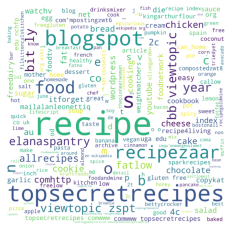

In [28]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
%matplotlib inline

wordcloud = WordCloud(stopwords=STOPWORDS,background_color='white',width=3000,height=3000).generate(text)


plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [29]:
from collections import Counter
wordfreq_dict = Counter(wordlist)

In [30]:
wordfreq_dict = {k: v for k, v in sorted(wordfreq_dict.items(), key=lambda item: item[1],reverse=True)}

In [31]:
wordfreq_dict

{'make': 48537,
 'time': 40407,
 'use': 35391,
 'great': 34557,
 'easy': 32568,
 'like': 32086,
 'one': 31439,
 'good': 29940,
 'made': 29315,
 'dish': 24769,
 'delicious': 23092,
 'also': 19851,
 'chicken': 19493,
 'sauce': 18443,
 'found': 18228,
 'love': 18125,
 'cooking': 17437,
 'serve': 15848,
 'really': 15471,
 'salad': 15089,
 'add': 15037,
 'used': 15023,
 'taste': 14771,
 'family': 14760,
 'favorite': 14381,
 'well': 14190,
 'recipes': 14179,
 'bread': 13857,
 'makes': 13701,
 'simple': 13617,
 'cheese': 13565,
 'little': 12983,
 'quick': 12834,
 'enjoy': 12689,
 'cookbook': 12542,
 'would': 12306,
 'try': 12269,
 'flavor': 12250,
 'way': 12202,
 'served': 11969,
 'food': 11926,
 'got': 11907,
 'fresh': 11512,
 'best': 11347,
 'ingredients': 11263,
 'cook': 11158,
 'tasty': 10821,
 'cream': 10748,
 'wonderful': 10688,
 'cake': 10650,
 'soup': 10583,
 "'ve": 10562,
 'meal': 10562,
 'sweet': 10542,
 'rice': 10470,
 'day': 10387,
 'even': 9891,
 'nice': 9838,
 'came': 9750,
 'al

**7)菜谱：用户必备技能（technicals**

In [32]:
TECHNIQUES_LIST = [
    'bake',
    'barbecue',
    'blanch',
    'blend',
    'boil',
    'braise',
    'brine',
    'broil',
    'caramelize',
    'combine',
    'crock pot',
    'crush',
    'deglaze',
    'devein',
    'dice',
    'distill',
    'drain',
    'emulsify',
    'ferment',
    'freez',
    'fry',
    'grate',
    'griddle',
    'grill',
    'knead',
    'leaven',
    'marinate',
    'mash',
    'melt',
    'microwave',
    'parboil',
    'pickle',
    'poach',
    'pour',
    'pressure cook',
    'puree',
    'refrigerat',
    'roast',
    'saute',
    'scald',
    'scramble',
    'shred',
    'simmer',
    'skillet',
    'slow cook',
    'smoke',
    'smooth',
    'soak',
    'sous-vide',
    'steam',
    'stew',
    'strain',
    'tenderize',
    'thicken',
    'toast',
    'toss',
    'whip',
    'whisk',
]

In [33]:
token_recipe = pd.read_csv('PP_recipes.csv')

In [34]:
token_recipe

,id,i,name_tokens,ingredient_tokens,steps_tokens,techniques,calorie_level,ingredient_ids
0,424415,23,"[40480, 37229, 2911, 1019, 249, 6878, 6878, 28...","[[2911, 1019, 249, 6878], [1353], [6953], [153...","[40480, 40482, 21662, 481, 6878, 500, 246, 161...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, ...",0,"[389, 7655, 6270, 1527, 3406]"
1,146223,96900,"[40480, 18376, 7056, 246, 1531, 2032, 40481]","[[17918], [25916], [2507, 6444], [8467, 1179],...","[40480, 40482, 729, 2525, 10906, 485, 43, 8393...","[1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, ...",0,"[2683, 4969, 800, 5298, 840, 2499, 6632, 7022,..."
2,312329,120056,"[40480, 21044, 16954, 8294, 556, 10837, 40481]","[[5867, 24176], [1353], [6953], [1301, 11332],...","[40480, 40482, 8240, 481, 24176, 296, 1353, 66...","[0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, ...",1,"[1257, 7655, 6270, 590, 5024, 1119, 4883, 6696..."
3,74301,168258,"[40480, 10025, 31156, 40481]","[[1270, 1645, 28447], [21601], [27952, 29471, ...","[40480, 40482, 5539, 21601, 1073, 903, 2324, 4...","[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0,"[7940, 3609, 7060, 6265, 1170, 6654, 5003, 3561]"
4,76272,109030,"[40480, 17841, 252, 782, 2373, 1641, 2373, 252...","[[1430, 11434], [1430, 17027], [1615, 23, 695,...","[40480, 40482, 14046, 1430, 11434, 488, 17027,...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, ...",0,"[3484, 6324, 7594, 243]"
...,...,...,...,...,...,...,...,...
178260,323143,76862,"[40480, 6444, 1964, 9369, 486, 569, 17551, 40481]","[[8780], [11835, 1762, 4465, 31494], [6812], [...","[40480, 40482, 729, 2525, 715, 485, 26641, 404...","[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",1,"[840, 208, 2499, 2683, 1925, 335, 1511]"
178261,149114,145962,"[40480, 17027, 24715, 974, 11877, 40481]","[[6812], [5940], [30645, 4785, 6821], [6953], ...","[40480, 40482, 729, 2525, 10906, 485, 43, 8393...","[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0,"[2499, 4717, 1168, 6270, 6324, 7040]"
178262,34200,65066,"[40480, 12187, 11434, 1738, 2627, 40481]","[[6167, 20930, 510], [1353], [15022, 6953], [6...","[40480, 40482, 500, 246, 1719, 5024, 240, 2366...","[1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, ...",2,"[2378, 7655, 3219, 2320, 5168, 5319, 4189, 268..."
178263,30618,77358,"[40480, 870, 488, 1325, 519, 2220, 2417, 488, ...","[[12395, 38308, 40118], [3137, 15022], [30878,...","[40480, 40482, 562, 481, 10734, 240, 23667, 58...","[0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, ...",0,"[5627, 2807, 5412, 3399, 7979, 1093, 1257, 780..."


In [35]:
# Converting to list
import json
token_recipe['techniques'] = token_recipe['techniques'].apply(lambda x:json.loads(x))

# Converting to np.array
token_recipe['techniques'] = np.array(token_recipe['techniques'])

In [36]:
for i in range(178265):
    if len(token_recipe['techniques'].iloc[i]) != 58:
        print(i)
    if i == 178264:
        print('all set')

all set


In [37]:
count = np.zeros_like(token_recipe['techniques'][0])
for i in range(178265):
    count += token_recipe['techniques'].iloc[i] 
count

array([64821,  1240,   565, 29387, 42354,   114,   213,  5178,   910,
       60136,  2628,  4737,   603,   264,  4156,     6, 29567,    64,
          32,  5405, 15086,  5584,  1248,  8942,  2702,    11,  4437,
        6460, 30865,  6405,   152,   984,   329, 48747,   222,  4535,
       20543,  6677, 15835,   255,   615,  4702, 29380, 26825,  2498,
        1023, 20465,  3397,     0,  3775,  1074,  3605,   143, 11753,
        6259, 18166,  7933, 16467])

In [38]:
tech_freq = { k:v for (k,v) in zip(TECHNIQUES_LIST, count)}
tech_freq_sorted = {k: v for k, v in sorted(tech_freq.items(), key=lambda item: item[1],reverse=True)}
tech_freq_sorted 

{'bake': 64821,
 'combine': 60136,
 'pour': 48747,
 'boil': 42354,
 'melt': 30865,
 'drain': 29567,
 'blend': 29387,
 'simmer': 29380,
 'skillet': 26825,
 'refrigerat': 20543,
 'smooth': 20465,
 'toss': 18166,
 'whisk': 16467,
 'saute': 15835,
 'fry': 15086,
 'thicken': 11753,
 'grill': 8942,
 'whip': 7933,
 'roast': 6677,
 'mash': 6460,
 'microwave': 6405,
 'toast': 6259,
 'grate': 5584,
 'freez': 5405,
 'broil': 5178,
 'crush': 4737,
 'shred': 4702,
 'puree': 4535,
 'marinate': 4437,
 'dice': 4156,
 'steam': 3775,
 'strain': 3605,
 'soak': 3397,
 'knead': 2702,
 'crock pot': 2628,
 'slow cook': 2498,
 'griddle': 1248,
 'barbecue': 1240,
 'stew': 1074,
 'smoke': 1023,
 'pickle': 984,
 'caramelize': 910,
 'scramble': 615,
 'deglaze': 603,
 'blanch': 565,
 'poach': 329,
 'devein': 264,
 'scald': 255,
 'pressure cook': 222,
 'brine': 213,
 'parboil': 152,
 'tenderize': 143,
 'braise': 114,
 'emulsify': 64,
 'ferment': 32,
 'leaven': 11,
 'distill': 6,
 'sous-vide': 0}